# Text Analysis
> **from :** https://pythonds.linogaliana.fr/content/NLP/02_exoclean.html

### Init

In [1]:
import random
import string
import re
import base64
from collections import Counter
from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pywaffle import Waffle

import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kodascii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kodascii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to /home/kodascii/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kodascii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kodascii/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### (Exercice_01) Loading spooky data

In [2]:
df = pd.read_csv('res/spooky.csv')
df.head(5)

,id,document,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


## DataViz

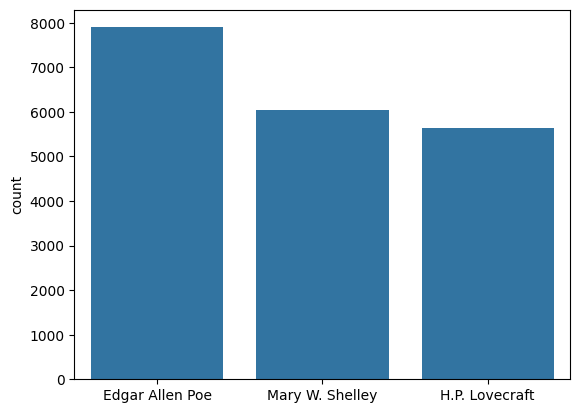

In [3]:
fig = plt.figure()
g = sns.barplot(
    x=["Edgar Allen Poe", "Mary W. Shelley", "H.P. Lovecraft"],
    y=df["author"].value_counts(),
)

In [4]:
authors = df['author'].unique()
print(f"==>> authors: {authors}")

==>> authors: ['EAP' 'HPL' 'MWS']


In [5]:
df[df['author'] == 'EAP'].head(10)

,id,document,author
0,id26305,"This process, however, afforded me no means of...",EAP
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
11,id16607,"Here we barricaded ourselves, and, for the pre...",EAP
14,id17189,But a glance will show the fallacy of this idea.,EAP
16,id08441,"To these speeches they gave, of course, their ...",EAP
18,id14862,I even went so far as to speak of a slightly h...,EAP
20,id11411,Now the net work was not permanently fastened ...,EAP


### Word Frequency

In [6]:
def author_word_freq(df, word):
    authors = df['author'].unique()
    frequences_by_author = dict()

    for author in authors:
        cmp = df[df['author'] == author]
        frequences_by_author[author] = len(cmp[cmp['document'].str.contains(word)])

    return frequences_by_author

#### $f($ word = `'fear'` $)$

==>> freqs: {'EAP': 70, 'HPL': 160, 'MWS': 211}


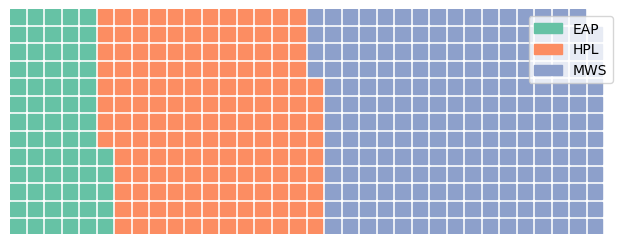

In [7]:
freqs = author_word_freq(df, word='fear')

print(f"==>> freqs: {freqs}")
plt.figure(
    FigureClass=Waffle,
    columns=35,
    values=freqs
)
plt.show()

#### $f($ word = `'horror'` $)$

==>> freqs: {'EAP': 58, 'HPL': 105, 'MWS': 59}


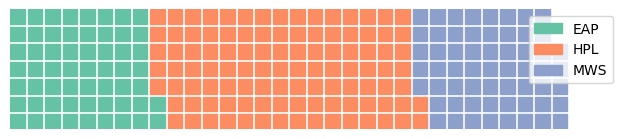

In [8]:
freqs = author_word_freq(df, word='horror')

print(f"==>> freqs: {freqs}")
plt.figure(
    FigureClass=Waffle,
    columns=35,
    values=freqs
)
plt.show()

### WordCloud

In [9]:
def make_wordcloud(corpus):
    wc = WordCloud(
        background_color="white",
        max_words=2000,
        contour_width=3,
        contour_color="steelblue",
    )
    wc.generate(corpus)
    return wc

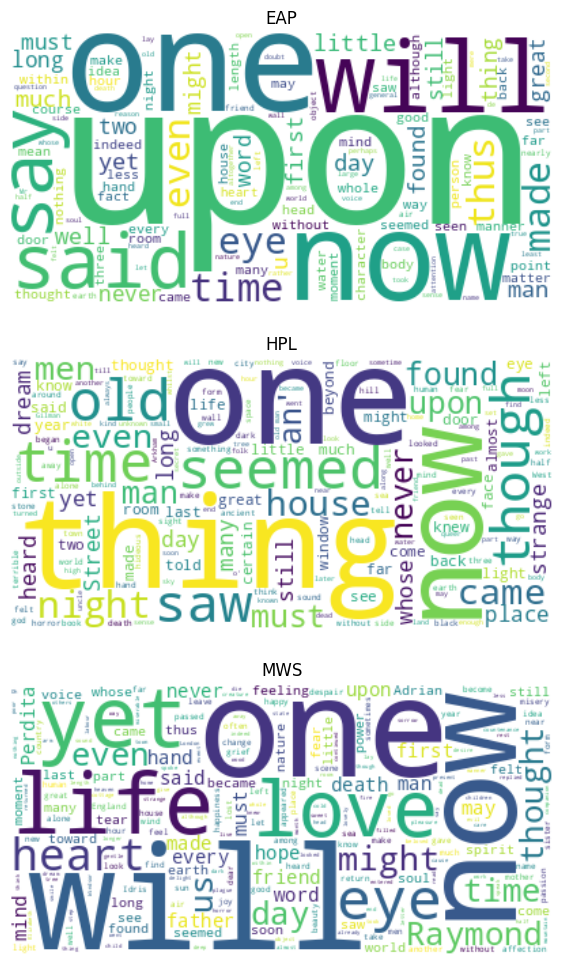

In [10]:
fig, axes = plt.subplots(len(authors), 1, figsize=(14, 12))

for author, ax in zip(authors, axes):
    author_wording = df[df['author'] == author]['document'].str.cat(sep=' ')
    author_wordcloud = make_wordcloud(author_wording)
    ax.imshow(author_wordcloud, interpolation="bilinear")
    ax.set_title(f'{author}')
    ax.axis('off')

plt.show()

### WordHistogram

In [11]:
def words_freq_dict(df, author, max_rank):
    author_wording = df[df['author'] == author]['document']
    word_freqs = dict()
    
    for value in author_wording:
        words = value.lower().translate(str.maketrans('', '', string.punctuation))
        words = words.split(' ')

        for w in words:
            if w in word_freqs:
                word_freqs[w] += 1
            else:
                word_freqs[w] = 1

    sorted_items = sorted(word_freqs.items(), key=lambda item: item[1], reverse=True)
    if max_rank is not None:
        sorted_items = sorted_items[:max_rank]

    return sorted_items

==>> words: ('the', 'of', 'and', 'to', 'a', 'in', 'i', 'it', 'that', 'was', 'my', 'with', 'is', 'at', 'as')
==>> freqs: (14993, 8972, 5735, 4765, 4728, 4124, 3777, 2327, 2317, 2224, 1788, 1696, 1665, 1590, 1572)


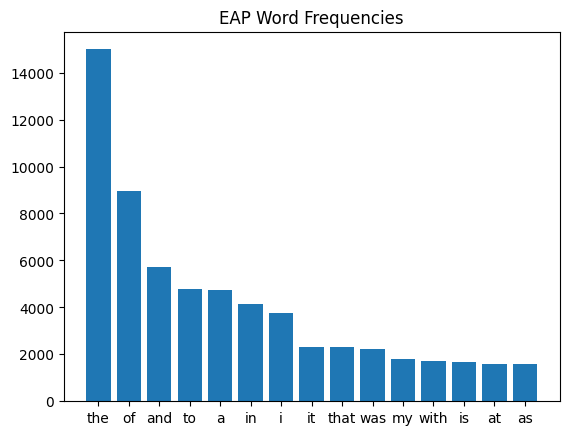

In [12]:
words, freqs = zip(*words_freq_dict(df, 'EAP', 15))
plt.title('EAP Word Frequencies')
plt.bar(words, freqs)
print(f'==>> words: {words}')
print(f'==>> freqs: {freqs}')

==>> words: ('the', 'and', 'of', 'a', 'to', 'in', 'i', 'was', 'that', 'had', 'he', 'it', 'as', 'his', 'with')
==>> freqs: (10933, 6098, 5846, 3297, 3248, 2736, 2655, 2174, 2014, 1779, 1630, 1369, 1173, 1171, 1122)


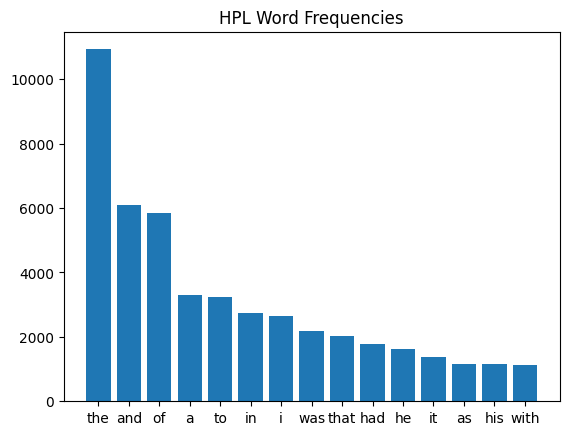

In [13]:
words, freqs = zip(*words_freq_dict(df, 'HPL', 15))
plt.title('HPL Word Frequencies')
plt.bar(words, freqs)
print(f'==>> words: {words}')
print(f'==>> freqs: {freqs}')

==>> words: ('the', 'of', 'and', 'to', 'i', 'a', 'my', 'in', 'was', 'that', 'her', 'his', 'with', 'he', 'me')
==>> freqs: (9659, 6137, 6123, 4829, 4316, 2711, 2659, 2598, 2249, 2092, 1657, 1646, 1529, 1484, 1473)


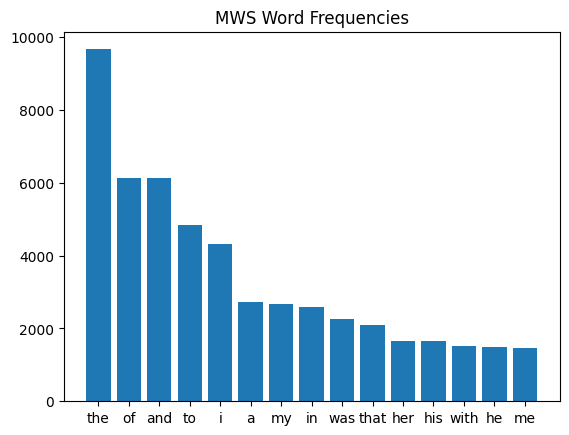

In [14]:
words, freqs = zip(*words_freq_dict(df, 'MWS', 15))
plt.title('MWS Word Frequencies')
plt.bar(words, freqs)
print(f'==>> words: {words}')
print(f'==>> freqs: {freqs}')

### Zipf Law

In [15]:
df_words_freq = pd.DataFrame(
    {
        "counter": df.groupby('author')
        .apply(lambda s: " ".join(s['document']).split())
        .apply(lambda s: Counter(s))
        .apply(lambda s: s.most_common())
        .explode()
    }
)

df_words_freq[["word", "count"]] = pd.DataFrame(
    df_words_freq["counter"].tolist(), index=df_words_freq.index
)
df_words_freq = df_words_freq.reset_index()
df_words_freq = df_words_freq.assign(
    total_count=lambda x: (x.groupby("author")["count"].transform("sum")),
    freq=lambda x: x["count"] / x["total_count"],
    rank=lambda x: x.groupby("author")["count"].transform("rank", ascending=False)
)
df_words_freq = df_words_freq.drop(columns=['counter'])

df_words_freq

/tmp/ipykernel_17769/2893195829.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda s: " ".join(s['document']).split())


,author,word,count,total_count,freq,rank
0,EAP,the,13927,200995,0.069290,1.0
1,EAP,of,8930,200995,0.044429,2.0
2,EAP,and,5222,200995,0.025981,3.0
3,EAP,to,4625,200995,0.023011,4.0
4,EAP,a,4514,200995,0.022458,5.0
...,...,...,...,...,...,...
69294,MWS,"feel.""",1,165710,0.000006,14826.5
69295,MWS,Stress,1,165710,0.000006,14826.5
69296,MWS,Adriatic,1,165710,0.000006,14826.5
69297,MWS,Gulph;,1,165710,0.000006,14826.5


In [16]:
df_words_freq[df_words_freq['word'] == 'the']

,author,word,count,total_count,freq,rank
0,EAP,the,13927,200995,0.069290,1.0
26521,HPL,the,10330,156651,0.065943,1.0
49048,MWS,the,9039,165710,0.054547,1.0


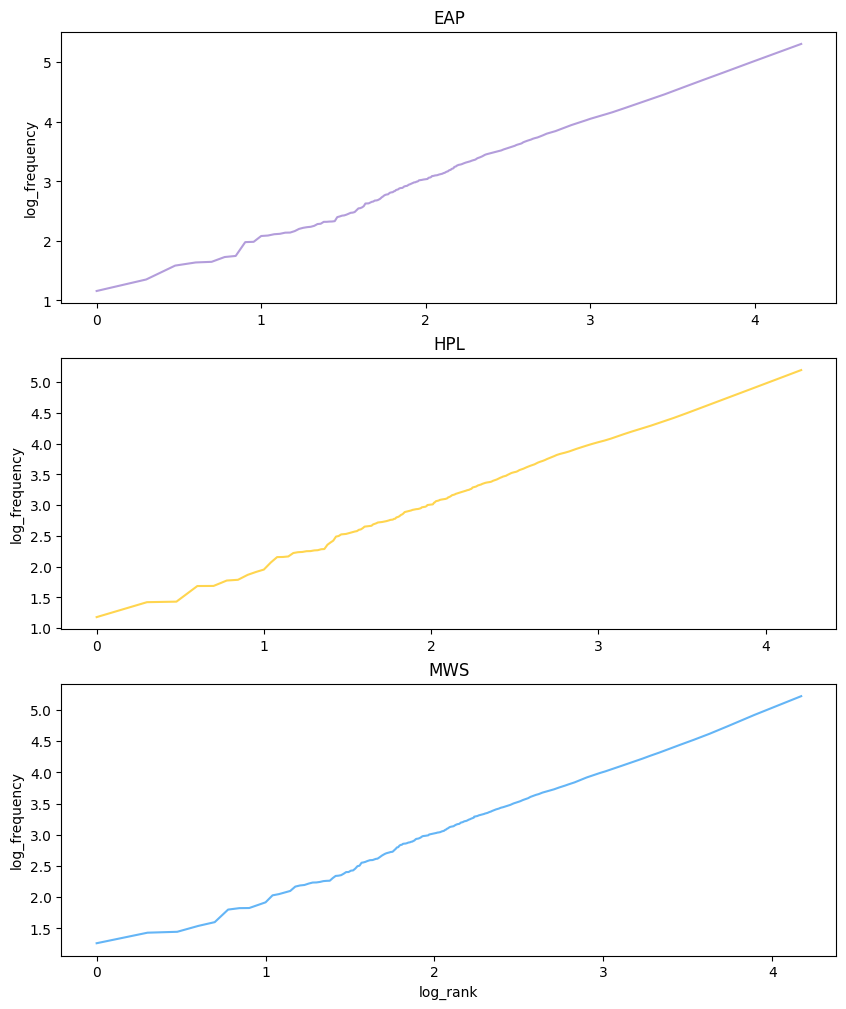

In [17]:
cmap = {'EAP': '#B39DDB', 'MWS': '#64B5F6', 'HPL': '#FFD54F'}

fig, axes = plt.subplots(len(authors), 1, figsize=(10, 12))
for author, ax in zip(authors, axes):
    author_word_count = df_words_freq[df_words_freq['author'] == author]

    ax.plot(
        author_word_count['rank'].apply(lambda x: np.log10(x)), 
        author_word_count['freq'].apply(lambda x: np.log10(1/x)),
        label=author, color=cmap[author]
    )
    ax.set_title(author)
    ax.set_ylabel('log_frequency')

plt.xlabel('log_rank')
plt.show()

## Text Cleaning

In [18]:
# Supprimer les punctuation
def proc_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Tokenization
def proc_tokenisation(text):
    return nltk.word_tokenize(text)

# Stopwords
def proc_stopwords(tokens):
    stop_words = set(stopwords.words('french'))
    return [ w for w in tokens if not w in stop_words ]

# Stemming
def proc_lemmatisation(words):
    lemm = WordNetLemmatizer()
    return ' '.join([lemm.lemmatize(word) for word in words]).strip(' ')

# From text to tokens
def proc_text2tokens(text):
    processed = text.lower()
    processed = proc_punctuations(processed)
    processed = proc_tokenisation(processed)
    processed = proc_stopwords(processed)
    processed = proc_lemmatisation(processed)
    return processed

In [19]:
df['document'] = df['document'].apply(proc_text2tokens)
df.head(10)

,id,document,author
0,id26305,this process however afforded no mean of ascer...,EAP
1,id17569,it never once occurred to that the fumbling mi...,HPL
2,id11008,in his left hand wa a gold snuff box from whic...,EAP
3,id27763,how lovely is spring we looked from windsor te...,MWS
4,id12958,finding nothing else not even gold the superin...,HPL
5,id22965,a youth passed in solitude my best year spent ...,MWS
6,id09674,the astronomer perhaps at this point took refu...,EAP
7,id13515,the surcingle hung in riband from my body,EAP
8,id19322,i knew that you could not say to yourself ster...,EAP
9,id00912,i confess that neither the structure of langua...,MWS


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['document'])
vocabulary = list(vectorizer.get_feature_names_out())

In [32]:
print(f'==>> vocabulary: {vocabulary}')
print(f'==>> index("fear") = {vocabulary.index("fear")}')
print(f'==>> freq("fear") = {vectorizer.transform(["abaft"])}')

==>> vocabulary: ['aaem', 'ab', 'aback', 'abaft', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abaout', 'abased', 'abasement', 'abashed', 'abashment', 'abate', 'abated', 'abatement', 'abating', 'abbey', 'abbreviation', 'abbé', 'abdicated', 'abdication', 'abdomen', 'abdul', 'abernethy', 'aberrancy', 'aberrant', 'aberration', 'abeyance', 'abhor', 'abhorred', 'abhorrence', 'abhorrent', 'abide', 'abigail', 'abijah', 'ability', 'abject', 'abjure', 'ablaze', 'able', 'ably', 'abnormal', 'abnormality', 'abnormally', 'aboard', 'abode', 'abolished', 'abominable', 'abomination', 'aboriginal', 'abortion', 'abortive', 'abounded', 'aboundingly', 'abounds', 'about', 'above', 'abra', 'abreast', 'abroad', 'abrupt', 'abruptly', 'abruptness', 'absconded', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absolved', 'absorb', 'absorbed', 'absorbing', 'absorbingly', 'absorption', 'abstain', 'abstained', 'abstaining', 'abstemious', 'abstract', 'abstracted', 'abstraction', 'abstractly', 'ab